## Perceptron using Numpy

Learned weights: [-0.0987427  -0.00132105]
Learned bias:    0.0
Predictions on AND inputs: [1 0 0 0]
Errors per epoch: [3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


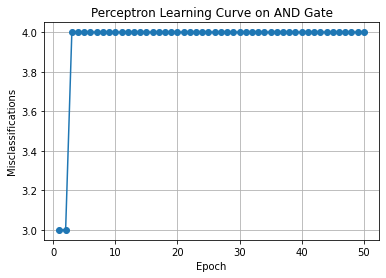

In [3]:
# Perceptron for AND gate (NumPy) + learning curve plot (Matplotlib)

import numpy as np
import matplotlib.pyplot as plt

# ---- Data: AND gate ----
# Inputs (x1, x2) and targets y
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)
y = np.array([0, 1, 1, 0], dtype=float)

# ---- Hyperparameters ----
lr = 0.1          # learning rate
max_epochs = 50   # safety cap; training will stop early when separable

# ---- Initialization ----
rng = np.random.default_rng(0)                  # reproducibility
w = rng.normal(0, 0.01, size=X.shape[1])        # small random weights
b = 0.0                                          # bias

def step(z: float) -> float:
    """Heaviside step activation."""
    return 1.0 if z >= 0 else 0.0

error_history = []  # number of misclassifications per epoch

# ---- Training loop (Perceptron Learning Rule) ----
for epoch in range(max_epochs):
    errors = 0
    for xi, target in zip(X, y):
        z = np.dot(xi, w) + b
        y_hat = step(z)
        update = lr * (target - y_hat)   # nonzero only when misclassified
        w += update * xi
        b += update
        errors += int(update != 0.0)
    error_history.append(errors)
    if errors == 0:   # perfectly classified => stop early
        break

# ---- Evaluate on training set ----
preds = np.array([step(np.dot(xi, w) + b) for xi in X])

print("Learned weights:", w)
print("Learned bias:   ", b)
print("Predictions on AND inputs:", preds.astype(int))
print("Errors per epoch:", error_history)

# ---- Plot learning curve ----
plt.figure()
plt.plot(range(1, len(error_history) + 1), error_history, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Misclassifications")
plt.title("Perceptron Learning Curve on AND Gate")
plt.grid(True)
plt.show()


## Perceptron using Scikit-Learn

Learned weights (coef_): [[2. 1.]]
Learned bias (intercept_): [-2.]
Predictions: [0 0 0 1]
Errors per epoch: [2, 1, 0]


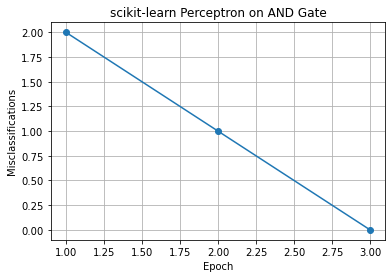

In [3]:
# scikit-learn Perceptron for AND gate + learning curve (errors per epoch)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# ---- Data: AND gate ----
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)
y = np.array([0, 0, 0, 1])

# ---- Model ----
# Use warm_start + max_iter=1 and call partial_fit in a loop to expose epochs
clf = Perceptron(fit_intercept=True, shuffle=False, tol=None,
                 max_iter=1, warm_start=True, random_state=0)

max_epochs = 50
classes = np.array([0, 1])
error_history = []

for epoch in range(max_epochs):
    # one full pass over the training set (one epoch)
    clf.partial_fit(X, y, classes=classes)

    # evaluate misclassifications after this epoch
    preds = clf.predict(X)
    errors = int(np.sum(preds != y))
    error_history.append(errors)
    if errors == 0:
        break

# ---- Report learned parameters and predictions ----
print("Learned weights (coef_):", clf.coef_)
print("Learned bias (intercept_):", clf.intercept_)
print("Predictions:", preds.astype(int))
print("Errors per epoch:", error_history)

# ---- Plot learning curve ----
plt.figure()
plt.plot(range(1, len(error_history)+1), error_history, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Misclassifications")
plt.title("scikit-learn Perceptron on AND Gate")
plt.grid(True)
plt.show()


## Multilayered Perceptron with Scikit- Learn

In [4]:
from sklearn.neural_network import MLPClassifier
X = [[0,0], [0, 1], [1, 0], [1, 1]]
y= [0, 1, 1, 0]
MyClsf = MLPClassifier(hidden_layer_sizes = (5, 5),random_state=42, max_iter=3000)

In [5]:
MyClsf.fit(X, y)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=3000, random_state=42)

In [6]:
pred1 = MyClsf.predict(X)

In [7]:
print(pred1)

[0 1 1 0]


In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(pred1, y)

1.0

## Another Perceptron Example to identify Hand-written digits

In [9]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
clf.score(X, y)

0.9393433500278241

In [12]:
X.size


115008